## Lectura de datos y eploracion de datos iniciales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv("dataset_banco.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [3]:
#Ver los tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


## Limpieza de datos

### Eliminacion de datos faltantes

In [4]:
# contar los datos faltantes
df.isnull().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#eliminamos los datos faltantes en las filas y lo escribimos en el dataframe
df.dropna(inplace=True) 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


### Eliminacion de columnas irrelevantes

In [7]:
# Analizamos las columnas categoricas
col_categoricas = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]
for col in col_categoricas:
    print(f"la columna {col} tiene {df[col].nunique()} valores unicos")


la columna job tiene 18 valores unicos
la columna marital tiene 6 valores unicos
la columna education tiene 10 valores unicos
la columna default tiene 2 valores unicos
la columna housing tiene 2 valores unicos
la columna loan tiene 6 valores unicos
la columna contact tiene 5 valores unicos
la columna month tiene 12 valores unicos
la columna poutcome tiene 6 valores unicos
la columna y tiene 2 valores unicos


No eliminamos ninguna columna categorica ya que todas tienen mas de 2 valores unicos

In [8]:
# Analizamos las columnas numericas
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


todas las columnas tienen una desviacion estandar diferente a cero por lo que no tienen valores unicos

### Deteccion y manjeo de registros duplicados

In [9]:
# Manejo de registros repetidos
print(f"antes de eliminar duplicados: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"despues de eliminar duplicados: {df.shape}")


antes de eliminar duplicados: (45207, 17)
despues de eliminar duplicados: (45203, 17)


### Deteccion y manejo de valores extremos

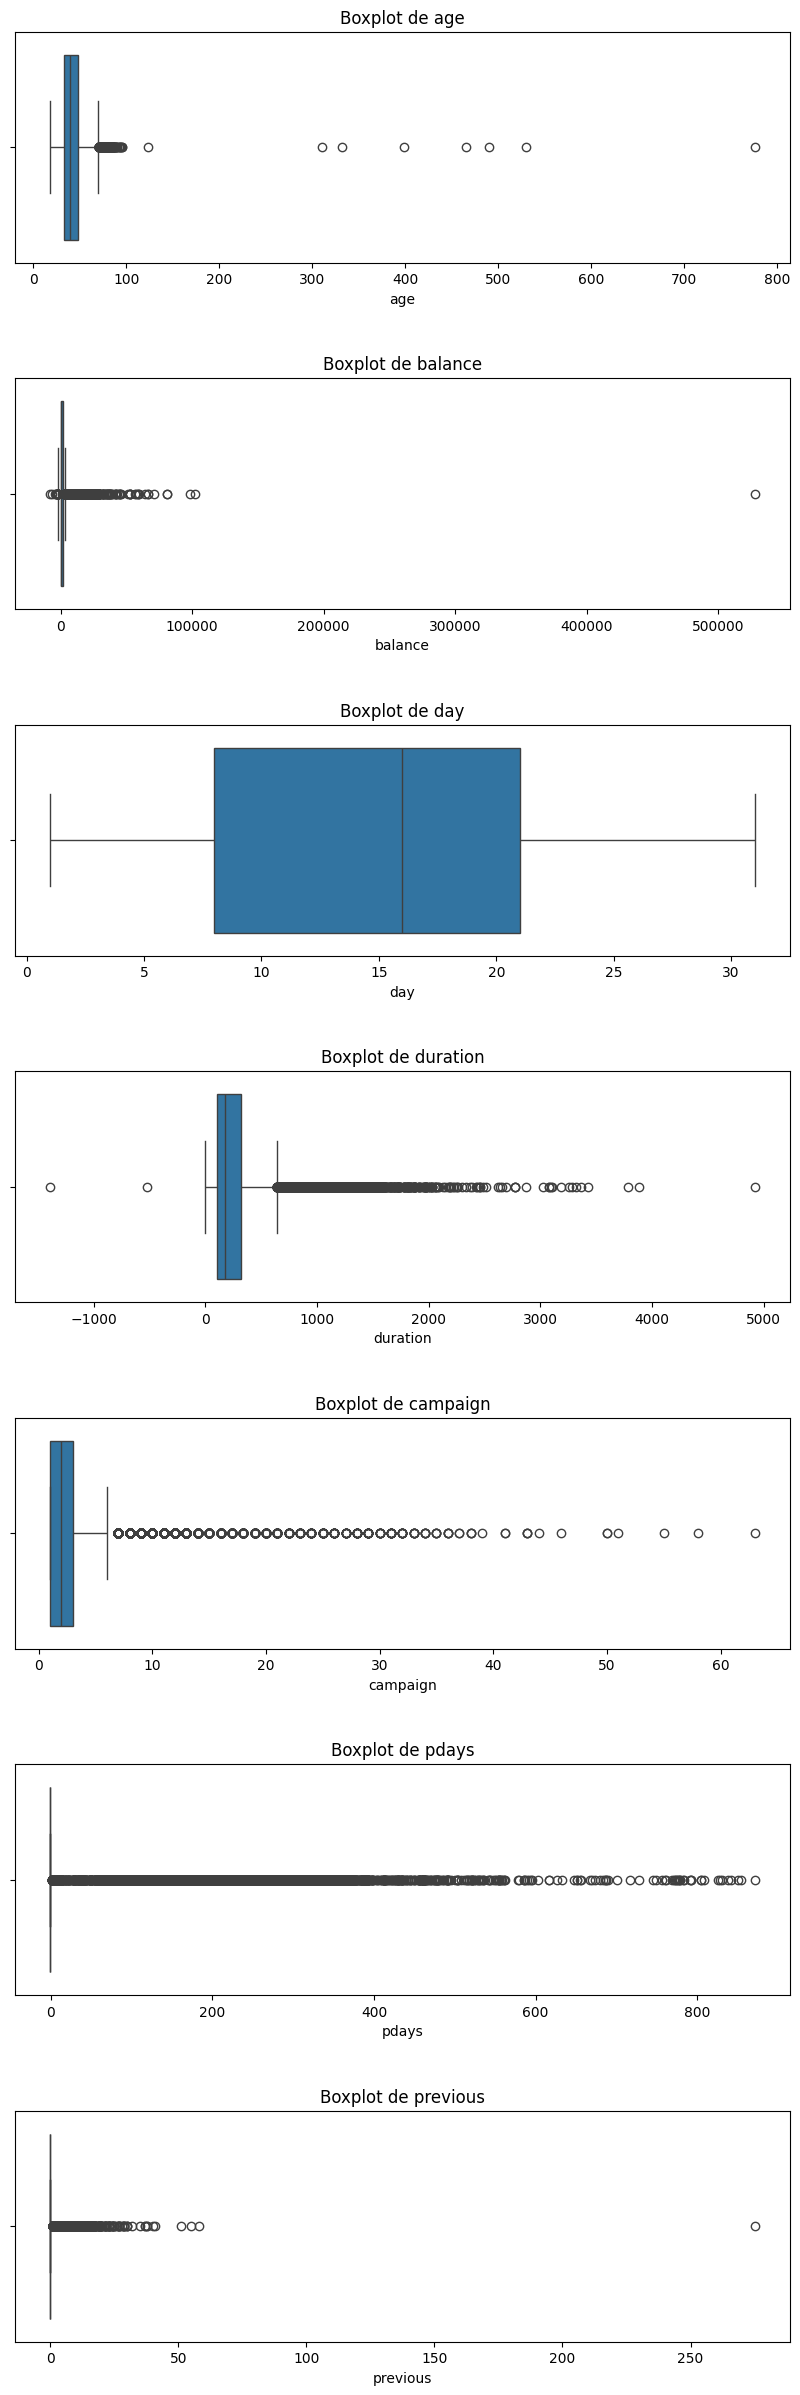

In [ ]:
# Manejo de valores extremos "outliers"
col_numericas = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# graficamos las variables numericas
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_numericas):
    # Boxplot
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(f'Boxplot de {col}')
    
    '''# Histograma
    sns.histplot(x=col, data=df, ax=ax[i], kde=True)
    ax[i,1].set_title(f'Histograma de {col}')
    
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)'''


Observacion:

Las columnas Edad, duration y previous. tienen valores extremos
* Edad: cuenta con edades mayores a 100 años
* duration: tiene valores negativos en las llamadas
* Previous: tiene un valor extremo 

In [11]:
# Eliminar edades mayores a los 100 años
df = df[df['age'] <= 100]
print(f"tamaño del data set: {df.shape}")

tamaño del data set: (45195, 17)


In [12]:
# Eliminar las filas con llamadas negativas
df = df[df['duration'] > 0]
print(f"tamaño del data set: {df.shape}")


tamaño del data set: (45190, 17)


In [13]:
# Eliminar valores con mas de 50 llamadas
df = df[df['previous'] <= 50]
print(f"tamaño del data set: {df.shape}")


tamaño del data set: (45186, 17)


### Correccion de errores tipograficos

In [14]:
# Limpieza de errores tipograficos
#ver la cantidad de valores unicos para cada variable categorica
def val_categorical (data, columns):    
    for col in columns:
        print(data[col].value_counts())
        print('-'*25)

val_categorical(df, col_categoricas)

job
blue-collar       9726
management        9450
technician        7591
admin.            5165
services          4151
retired           2262
self-employed     1577
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64
-------------------------
marital
married     27198
single      12780
divorced     5194
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64
-------------------------
education
secondary    23180
tertiary     13296
primary       6844
unknown       1855
SECONDARY        3
Primary          2
UNK              2
sec.             2
Secondary        1
Tertiary         1
Name: count, dtype: int64
-------------------------
default
no     44371
yes      815
Name: count, dtype: int64
-------------------------
housing
yes    25108
no 

In [15]:
# Convertir el texto de las columnas en minusculas
for value in df.columns:
    # verificamos si la columna es categorica
    if value in col_categoricas:
        df[value] = df[value].str.lower()

val_categorical(df, col_categoricas)

job
blue-collar       9726
management        9454
technician        7591
admin.            5165
services          4152
retired           2263
self-employed     1578
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
administrative       3
Name: count, dtype: int64
-------------------------
marital
married     27198
single      12784
divorced     5197
div.            7
Name: count, dtype: int64
-------------------------
education
secondary    23184
tertiary     13297
primary       6846
unknown       1855
sec.             2
unk              2
Name: count, dtype: int64
-------------------------
default
no     44371
yes      815
Name: count, dtype: int64
-------------------------
housing
yes    25108
no     20078
Name: count, dtype: int64
-------------------------
loan
no     37946
yes     7240
Name: count, dtype: int64
-------------------------
contact
cellular     29268
unknown      13011
telephone     2901
phone            

In [16]:
# corregir valores equivalentes 
df.loc[df['job'] == 'admin.', 'job'] = 'administrative' 
df.loc[df['marital'] == 'div.', 'marital'] = 'divorced'
df.loc[df['education'] == 'sec.', 'education'] = 'secondary'
df.loc[df['education'] == 'unk', 'education'] = 'unknown'
df.loc[df['contact'] == 'phone', 'contact'] = 'telephone'
df.loc[df['contact'] == 'mobile', 'contact'] = 'cellular'
df.loc[df['poutcome'] == 'unk', 'poutcome'] = 'unknown'

val_categorical(df, col_categoricas)

job
blue-collar       9726
management        9454
technician        7591
administrative    5168
services          4152
retired           2263
self-employed     1578
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
Name: count, dtype: int64
-------------------------
marital
married     27198
single      12784
divorced     5204
Name: count, dtype: int64
-------------------------
education
secondary    23186
tertiary     13297
primary       6846
unknown       1857
Name: count, dtype: int64
-------------------------
default
no     44371
yes      815
Name: count, dtype: int64
-------------------------
housing
yes    25108
no     20078
Name: count, dtype: int64
-------------------------
loan
no     37946
yes     7240
Name: count, dtype: int64
-------------------------
contact
cellular     29271
unknown      13011
telephone     2904
Name: count, dtype: int64
-------------------------
month
may    13747
jul     6894
aug     6246

## Analisis exploratorio de datos

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\2869209556.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\2869209556.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\2869209556.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\2869209556.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_

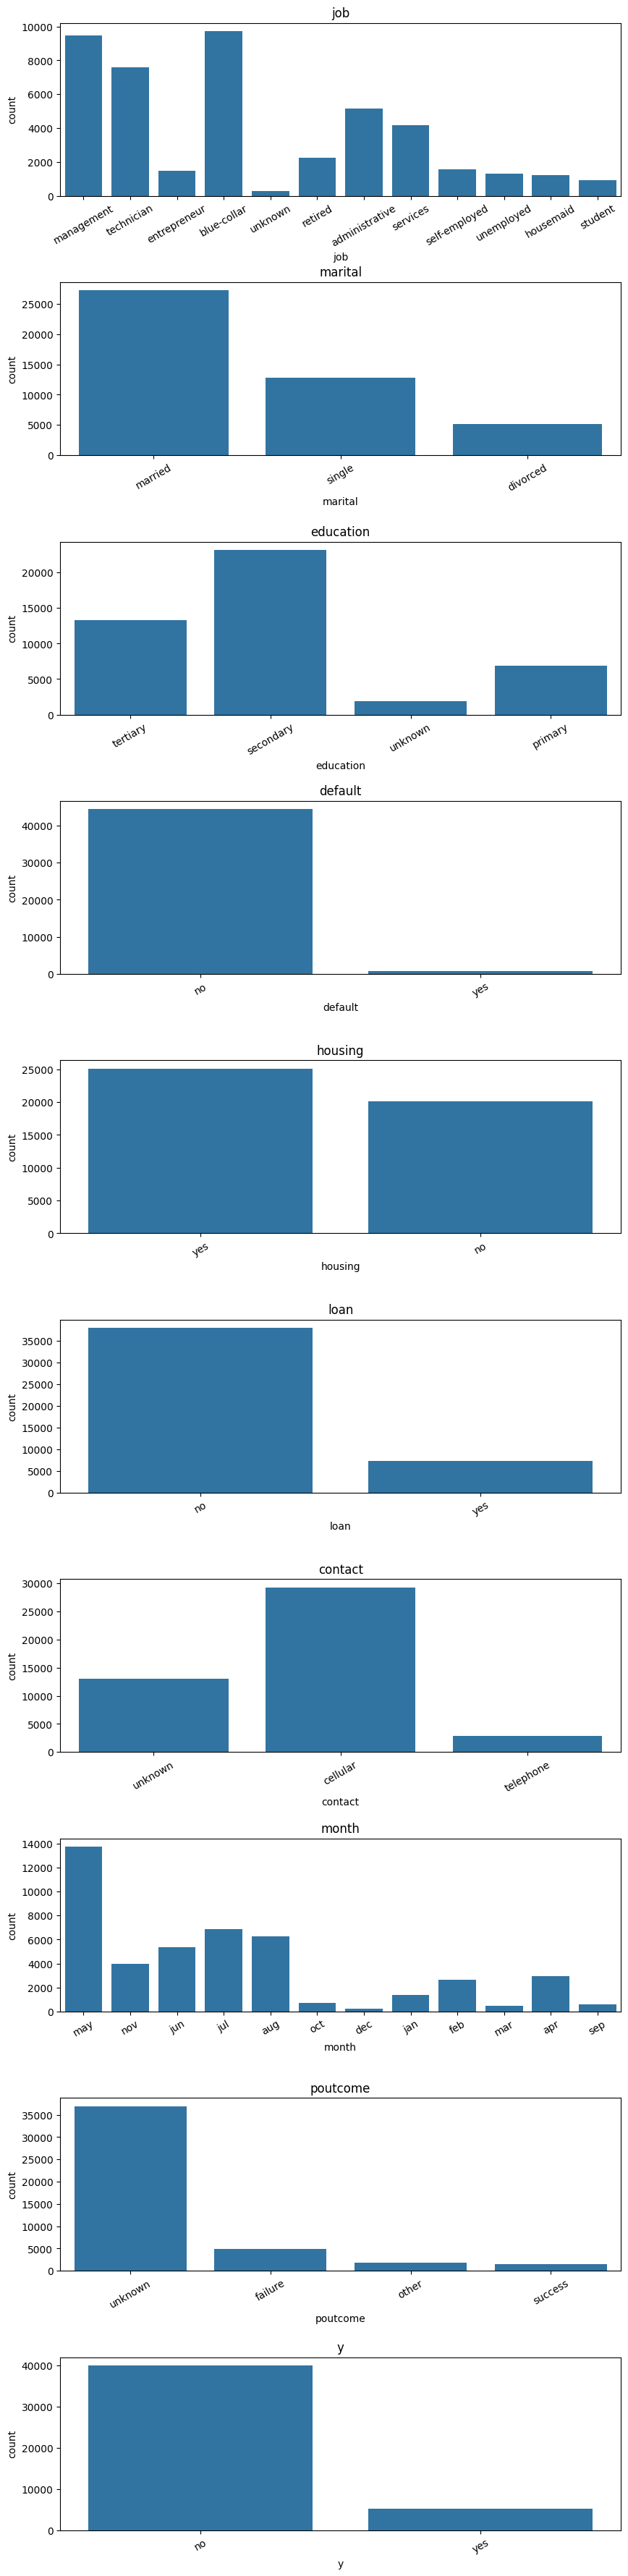

In [ ]:
# analisis de cada variable categorica de manera individual
# grafico de barras de conteo de cada variable
fig, ax = plt.subplots(nrows=len(col_categoricas), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_categoricas):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
    
    

Observaciones

* 'job' cuenta con 12 valores, management, technical y blue-collar cuentan con la mayor cantidad de datos
* 'marital' cuenta con 3 valores, la mayoria de las personas contactadas son casadas
* 'education' cuenta con 4 valores y gran parte de los contactados tiene un nivel de educacion de secundaria
* 'default' (yes, no). En esta coluymna la mayoria de los contactados tienen el valor de no
* 'housing' (yes, no). En esta columna el set esta relativamente balanceado
* 'loan' (yes, no). La mayoria de los valores de la columna son de no
* 'contact' cuenta con 3 valores donde la mayotia fue contactado por celular
* 'poutcome' la mayoria de los datos es desconocido para los resultado de la campaña de marketing anterior
* 'y' (yes, no). La gran mayoria de los valores es no, se tiene que tomar en cuenta este desbalance para realizar un modelo de machine learning 

In [19]:
# Eliminamos las columnas que no son necesarias para el analisis
df.drop(columns=['contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous'], inplace= True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

In [20]:
# extraemos informacion de las variables numericas 'age' y 'balance'
df.describe()

,age,balance
count,45186.000000,45186.000000
mean,40.936640,1374.061878
std,10.618708,3924.494665
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


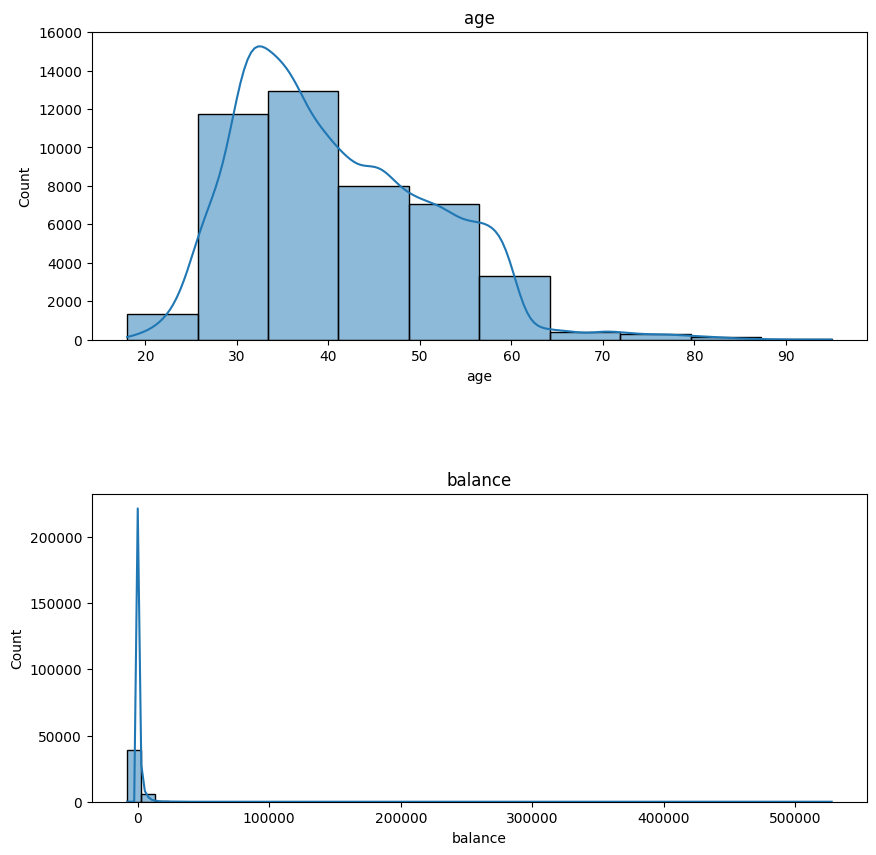

In [21]:
# graficamos las variables numericas 'age' y 'balance'
col_numericas = ['age', 'balance']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_numericas):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde=True)
    ax[i].set_title(col)


In [22]:
# observamos a mas detalle la variable 'balance'
df['balance'].describe()

count     45186.000000
mean       1374.061878
std        3924.494665
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

Observaciones 

* La mayor parte de contactados tiene entre 30 a 45 años con un sesgo a los 30 a 40 años
* El 75% de los contactados tiene saldo negativos o menores a 1500$ aproximadamente  

### Analisis univariado

In [23]:
# la variable a predecir es 'y' y la representaremos como 1 y 0
encoder = LabelEncoder()
df['y_bin'] = encoder.fit_transform(df['y'])

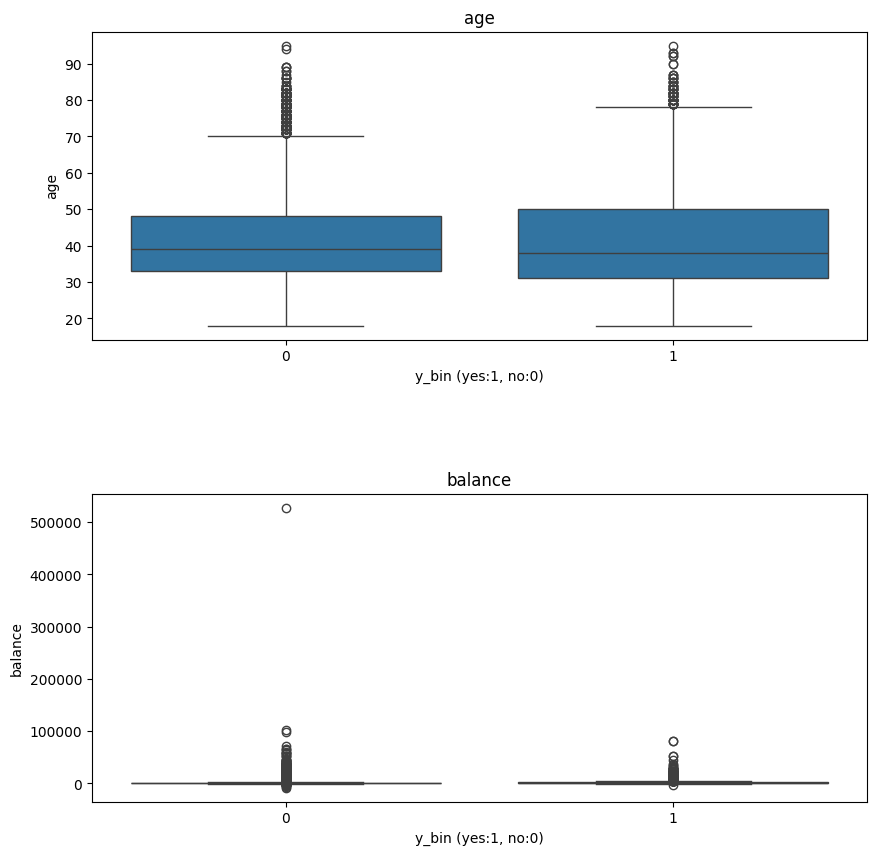

In [24]:
# analizar la relacion de 'age' y 'balance' con la variable a predecir 'y'
fig ,ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_numericas):
    sns.boxplot(x='y_bin', y=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('y_bin (yes:1, no:0)')

Observaciones

* No se observan diferencias entre 'age' y 'balance' de las personas que adquirieron o no el producto

In [25]:
# funciion para graficar las tasas de conversion
def tasa_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir
    # generar agrupaciones de la variable predictora para calcular la tasa de conversion
    grupo = df.groupby(x)[y].mean().mul(100).rename('tasa_conversion').reset_index()
    
    # generar las grafias
    if type == 'line':
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=var_predictora, y='tasa_conversion', data=grupo, marker='o')
        plt.grid()
    elif type == 'bar':
        plt.figure(figsize=(15, 6))
        sns.barplot(x=var_predictora, y='tasa_conversion', data=grupo, order=order)
        plt.grid()
    else:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=var_predictora, y='tasa_conversion', data=grupo, marker='o')
        plt.grid()

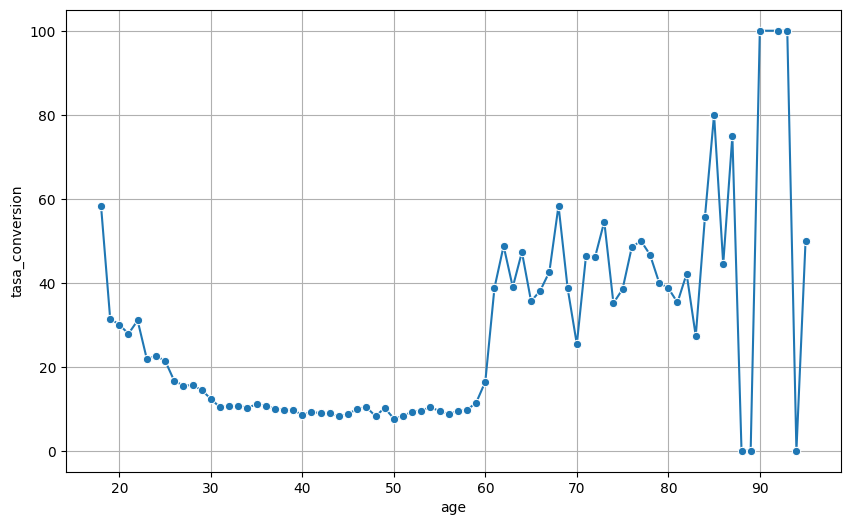

In [26]:
# graficar la tasa de conversion para la variable predictora age
tasa_conversion('age', 'y_bin')

Observaciones

* Se puede observar 3 grupos de edades, un grpo de personas de 18 a 25 años, otro grupo de personas de 25 a 60 años y personas mayores a 60 años

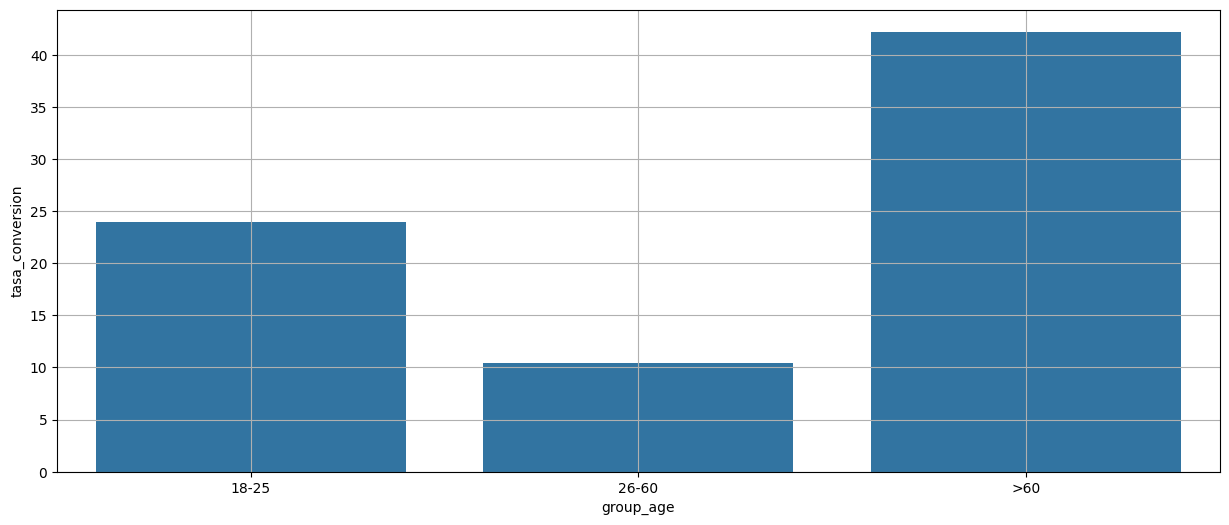

In [27]:
# creamos una nueva variable con los rangos de edades encontradas
df.loc[:, 'group_age']="18-25"
df.loc[(df['age']>25) & (df['age']<=60), 'group_age'] = "26-60"
df.loc[df['age']>60, 'group_age'] = ">60"

# graficar la tasa de conversion para la variable predictora 'group_age'
tasa_conversion('group_age', 'y_bin', type='bar')

Observaciones.

Se puede observar con mas claridad que hay 3 rangos de edades bien diferenciadas

In [28]:
# eliminar la variable 'age'
df.drop(columns=['age'], inplace=True)

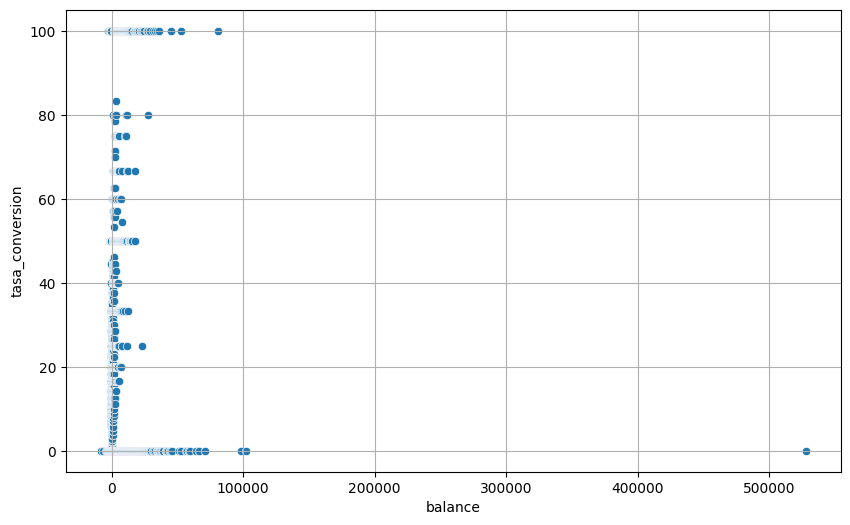

In [29]:
# graficamos la tasa de conversion para la variable predictora 'balance'
tasa_conversion('balance', 'y_bin', type='scatter')

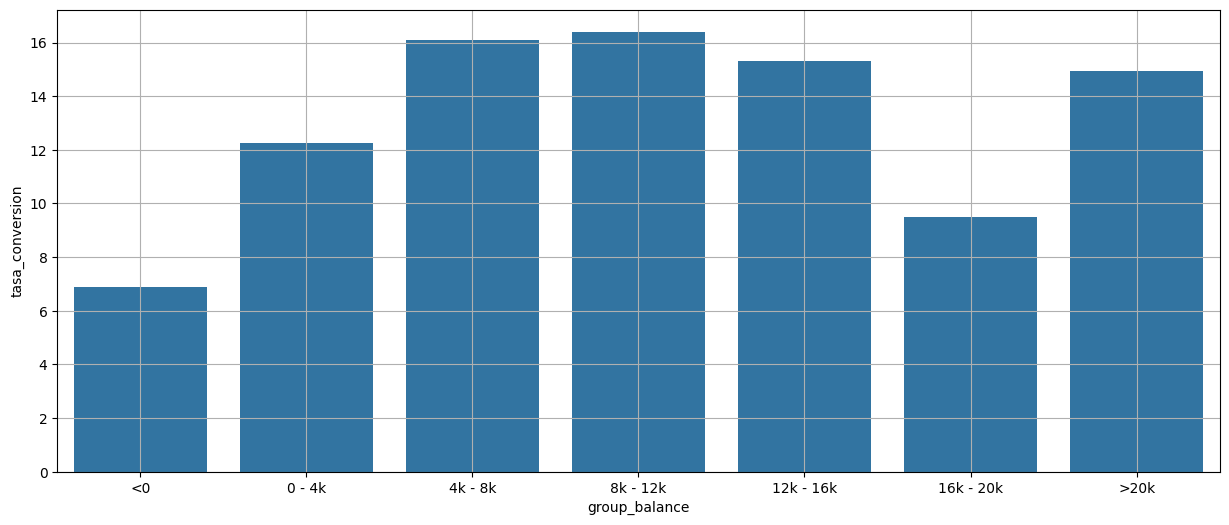

In [30]:
# No se logra observar una tencia clara, por lo que se generan rangos de balance
# creamos una varaible con los rangos de balance encontrados
df.loc[:, 'group_balance'] = "<0"
df.loc[(df['balance']>0) & (df['balance']<4000), 'group_balance'] = "0 - 4k"
df.loc[(df['balance']>=4000) & (df['balance']<8000), 'group_balance'] = "4k - 8k"
df.loc[(df['balance']>=8000) & (df['balance']<12000), 'group_balance'] = "8k - 12k"
df.loc[(df['balance']>=12000) & (df['balance']<16000), 'group_balance'] = "12k - 16k"
df.loc[(df['balance']>=16000) & (df['balance']<20000), 'group_balance'] = "16k - 20k"
df.loc[df['balance']>=20000, 'group_balance'] = ">20k" 

# graficar la tasa de conversion para la variable predictora 'group_balance'
tasa_conversion('group_balance', 'y_bin', type='bar', order=["<0", "0 - 4k", "4k - 8k", "8k - 12k", "12k - 16k", "16k - 20k", ">20k"])

Observaciones
* Se logra apreciar un patron ascendente en el saldo y una bajada en el rango de 16k a 20k, con esta observacion podriamos definir nuevos rangos de interes como ser:
    * 0 - 4k
    * 4k - 16k
    * 16k - 20k
    * mayor 20k

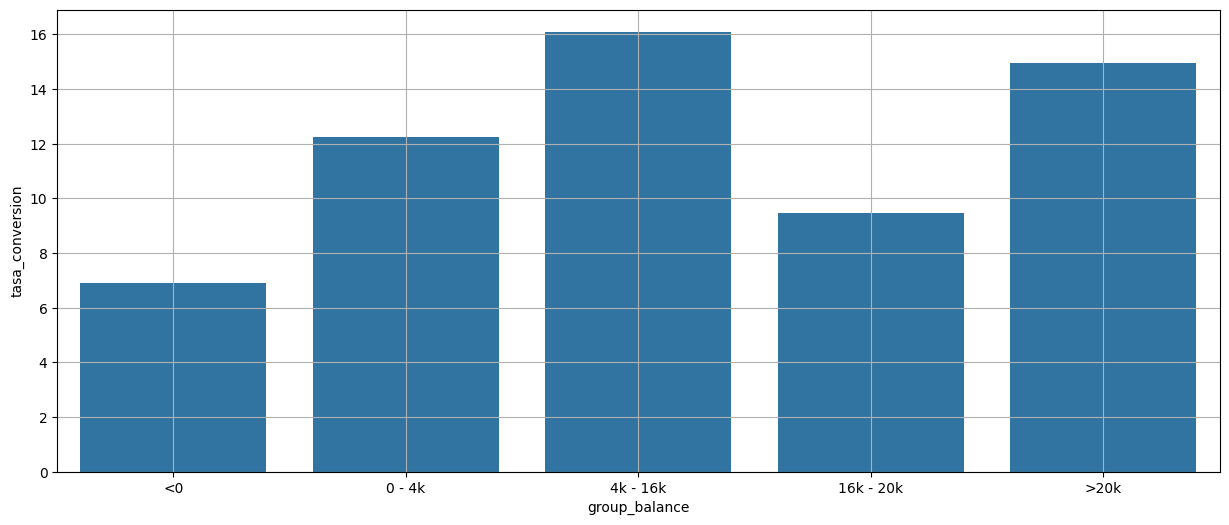

In [31]:
# generamos los nuevos rangos de interes en la variable predictora 'group_balance'
df.loc[:, 'group_balance'] = "<0"
df.loc[(df['balance']>0) & (df['balance']<4000), 'group_balance'] = "0 - 4k"
df.loc[(df['balance']>=4000) & (df['balance']<16000), 'group_balance'] = "4k - 16k"
df.loc[(df['balance']>=16000) & (df['balance']<20000), 'group_balance'] = "16k - 20k"
df.loc[df['balance']>=20000, 'group_balance'] = ">20k"

# graficar la tasa de conversion para la variable predictora 'group_balance'
tasa_conversion('group_balance', 'y_bin', type='bar', order=["<0", "0 - 4k", "4k - 16k", "16k - 20k", ">20k"])

In [32]:
# eliminamos la variable 'balance'
df.drop(columns='balance', inplace=True)

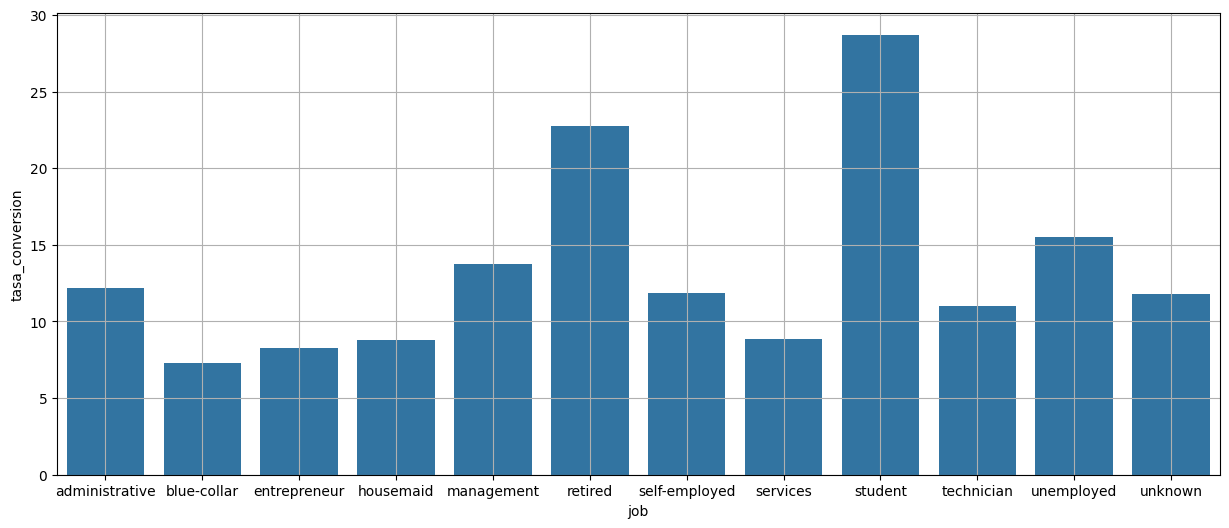

In [ ]:
# realizamos el mismo analisis para las variables categoricas
# graficamos la tasa de converion para la variable  'job'
tasa_conversion('job', 'y_bin', type='bar')

Observaciones
* Los trabajos 'retired' y 'student' tienen mayor tasa de conversion, por lo que job podria ser una variable predictora

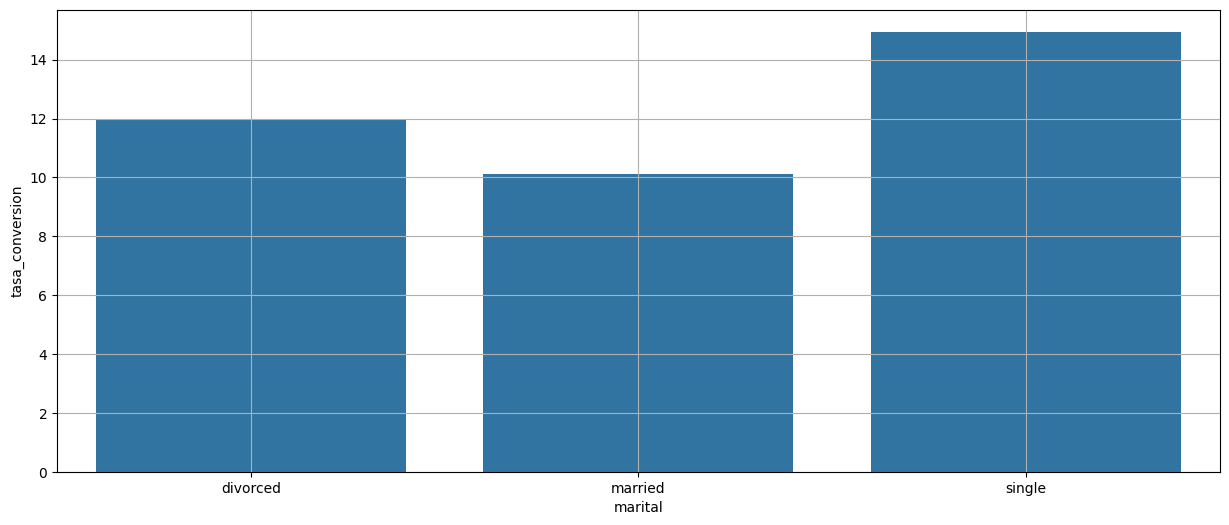

In [34]:
# analisis de la variable 'marital'
tasa_conversion('marital', 'y_bin', type='bar')

Observaciones
* La tasa de conversion para 'divorced', 'married' y 'single' son muy similares, por lo que marital no seria una variable predictora

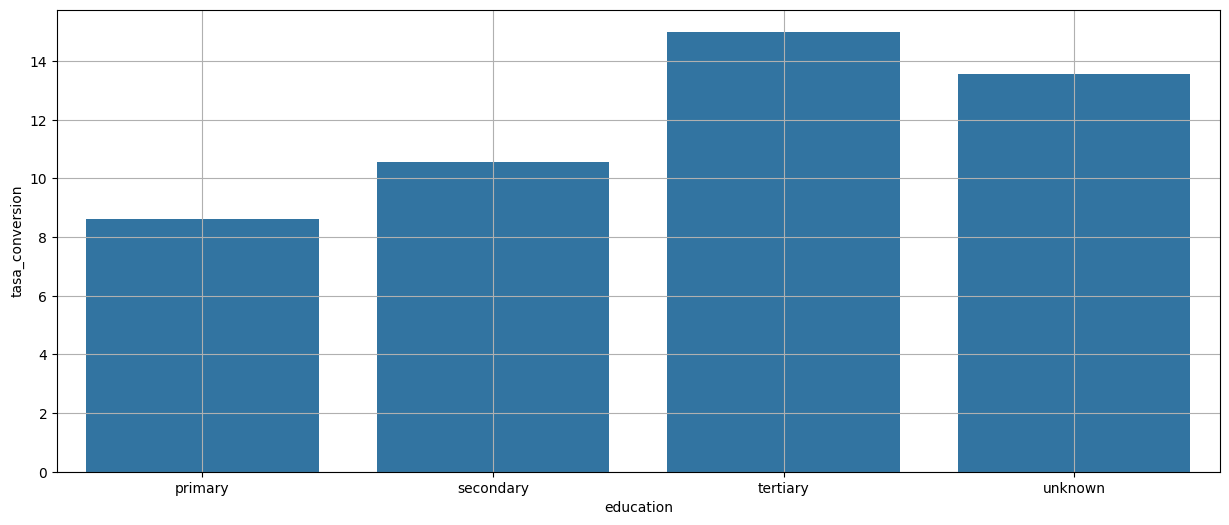

In [35]:
# analisis de la variable 'education'
tasa_conversion('education', 'y_bin', type='bar')

Observaciones
* Hay un ligero incremento en la tasa de conversion para la variable education, por lo que podria ser una variable predictora

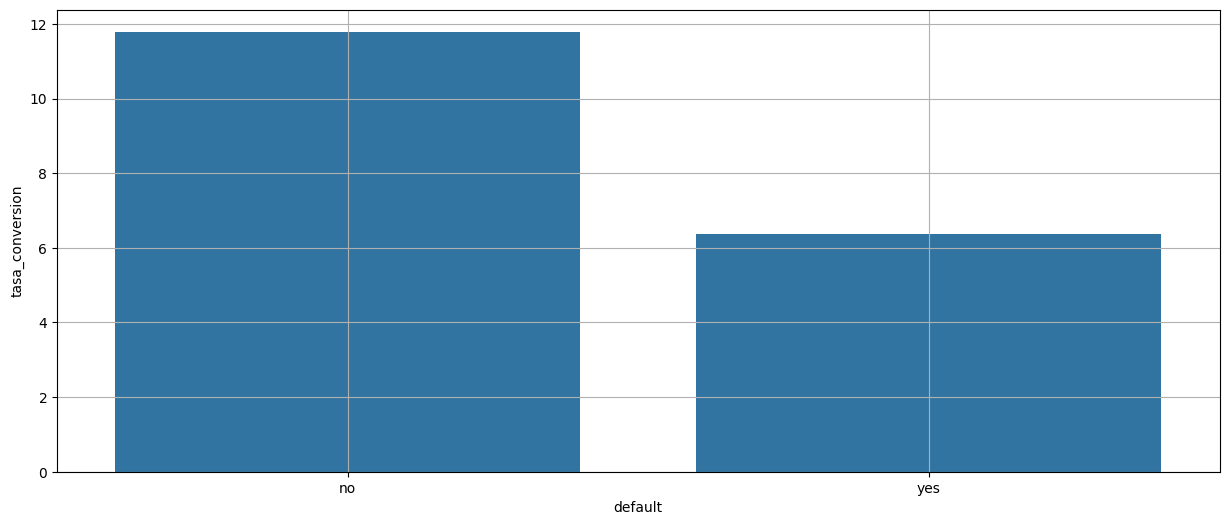

In [36]:
# analisis de la variable 'default'
tasa_conversion('default', 'y_bin', type='bar')

Observaciones
* La tasa de conversion de los que no tiene deuda 'default' es de casi el doble de las que tienen, podria ser una variable predictora 

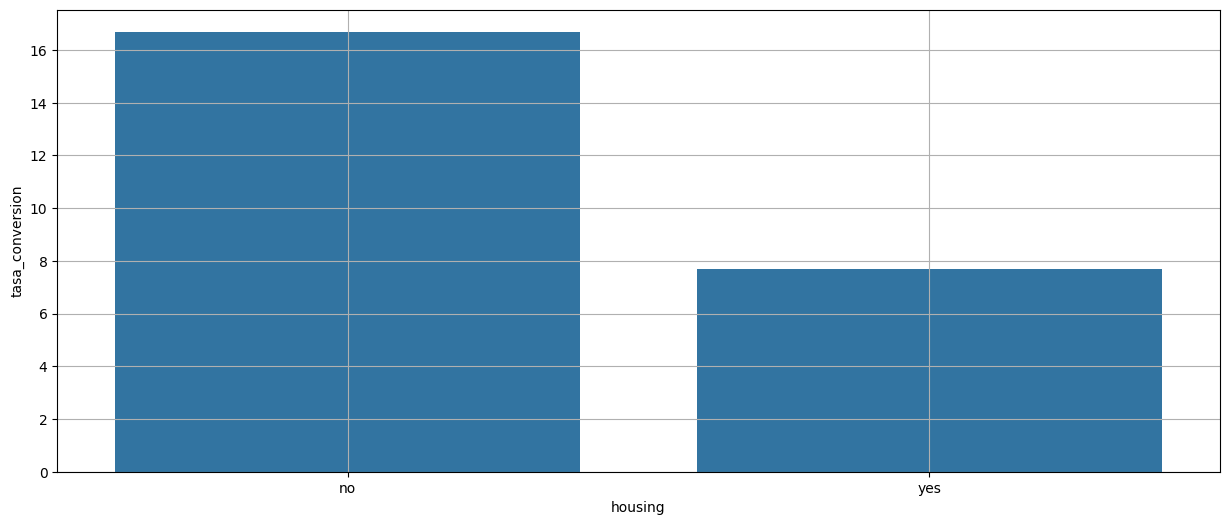

In [37]:
# analisis de la variable 'housing'
tasa_conversion('housing', 'y_bin', type='bar')

Observaciones
* Tienen mayores tasas de conversion las personas que no tienen credito hipotecario. Es una variable predictora

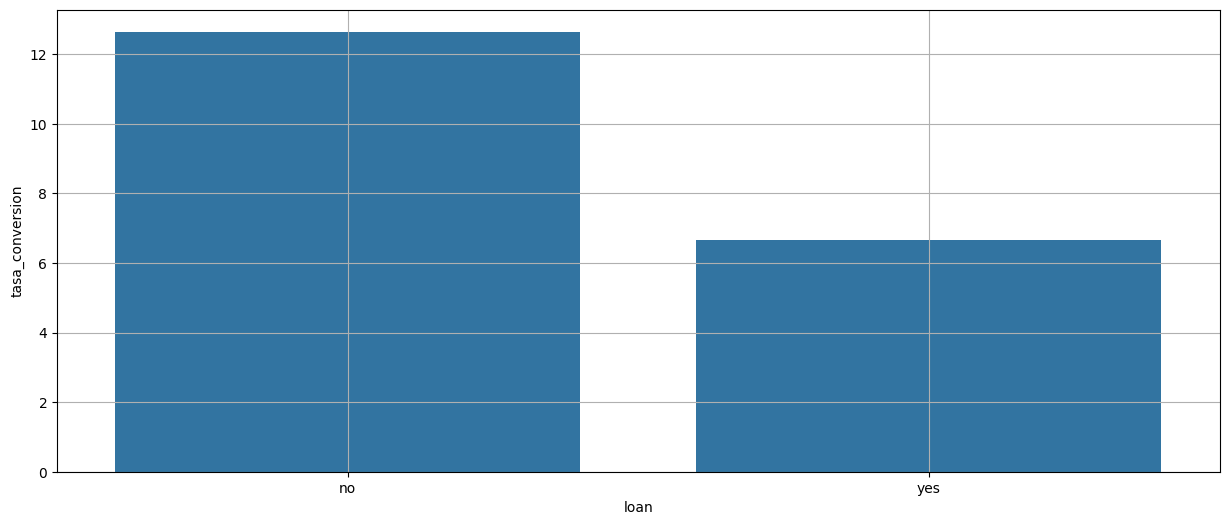

In [38]:
# analisis de la variable 'loan'
tasa_conversion('loan', 'y_bin', type='bar')

Observaciones
* Las personas que no tienen credito de consumo tienen mayores tasas de conversion. Loan es una variable predictora

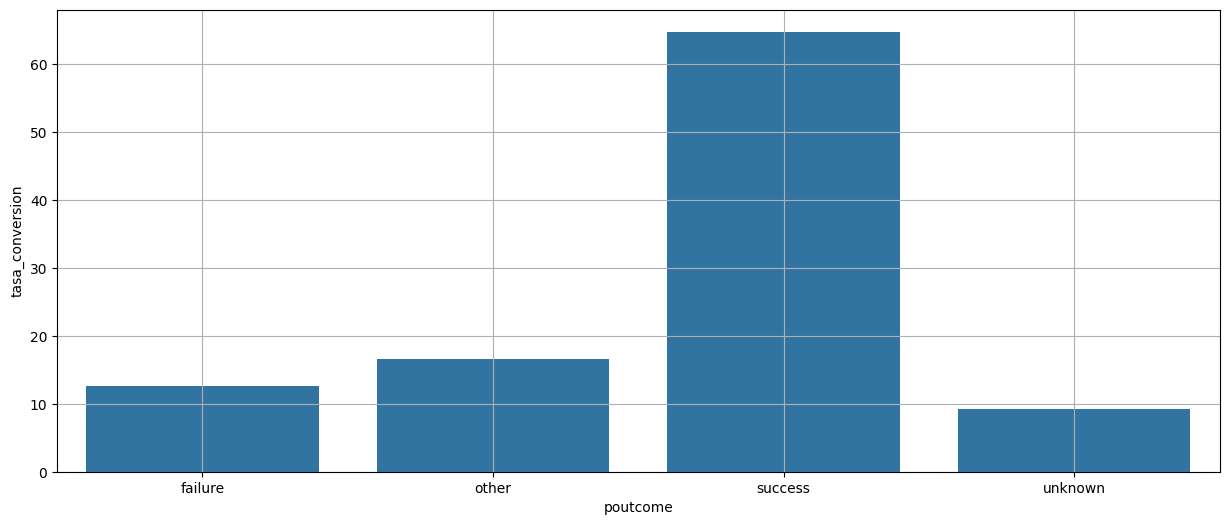

In [39]:
# analisis de la variable 'poutcome'
tasa_conversion('poutcome', 'y_bin', type='bar')

Observaciones
* Si la persona adquirio un producto en la campaña anterior tiene mayor tasa de conversion por lo que pueda adquirir el producto.
* Es una variable predictora

### Resumen
Las variables predictoras con mayor impacto en la tasa de conversion son las siguientes:
1. Poutcome con casi el 70%
2. Job con el 23% y 28% en 'retired' y 'student'
3. Group_balance y group_age con tasas de conversion entre el 16% y 40% 
4. Default, housing y loan con tasas de conversion entre el 12% y 16%
5. martial y education con tasas de conversion entre el 12% y 14% 

### Analisis bivariado

In [40]:
# funcion para graficar la tasa de conversion para 2 variables categoricas
def tasa_conversion_bi(var_predictora_list, order=None):
    # generar agrupaciones de la variable predictora para calcular la tasa de conversion
    grupo = df.groupby(var_predictora_list)['y_bin'].mean().to_frame().reset_index()
    
    # grafica
    plt.figure(figsize=(15, 7))
    ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.title(f'Tasa de conversion para {var_predictora_list[0]} y {var_predictora_list[1]}')
    plt.xlabel('Tasa de conversion en %')
    plt.xlim(0,1)

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


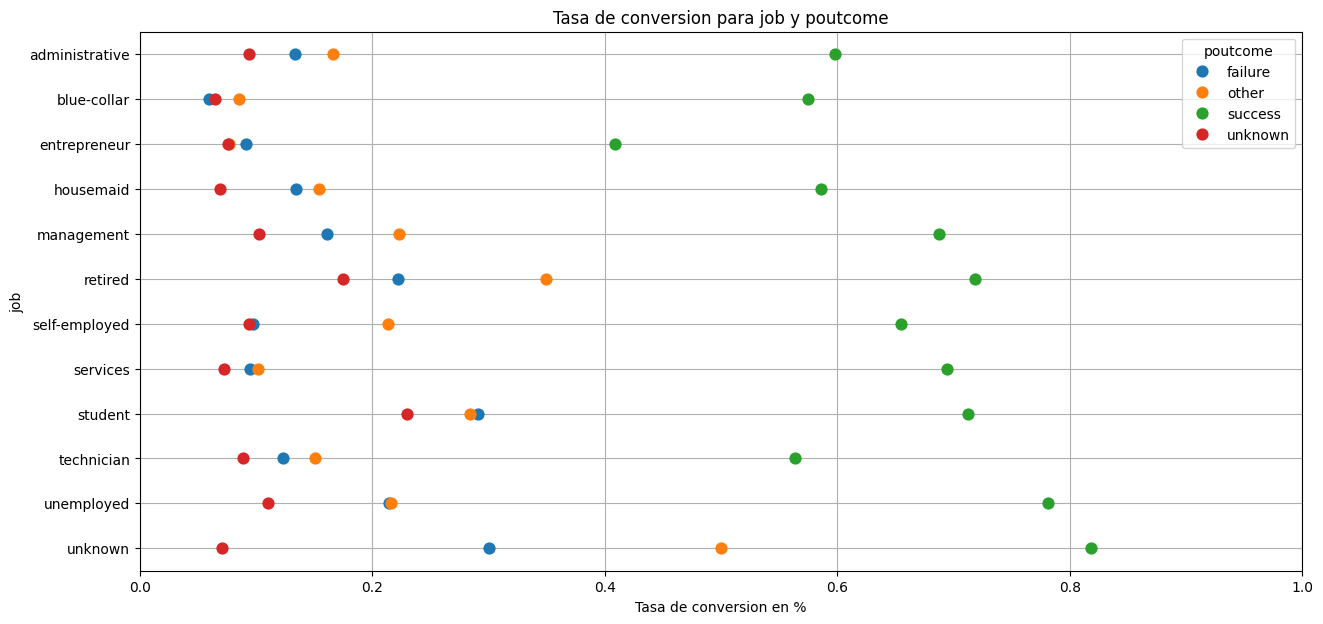

In [41]:
# analisis de las variables poutcome y job
tasa_conversion_bi(['job', 'poutcome'])

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


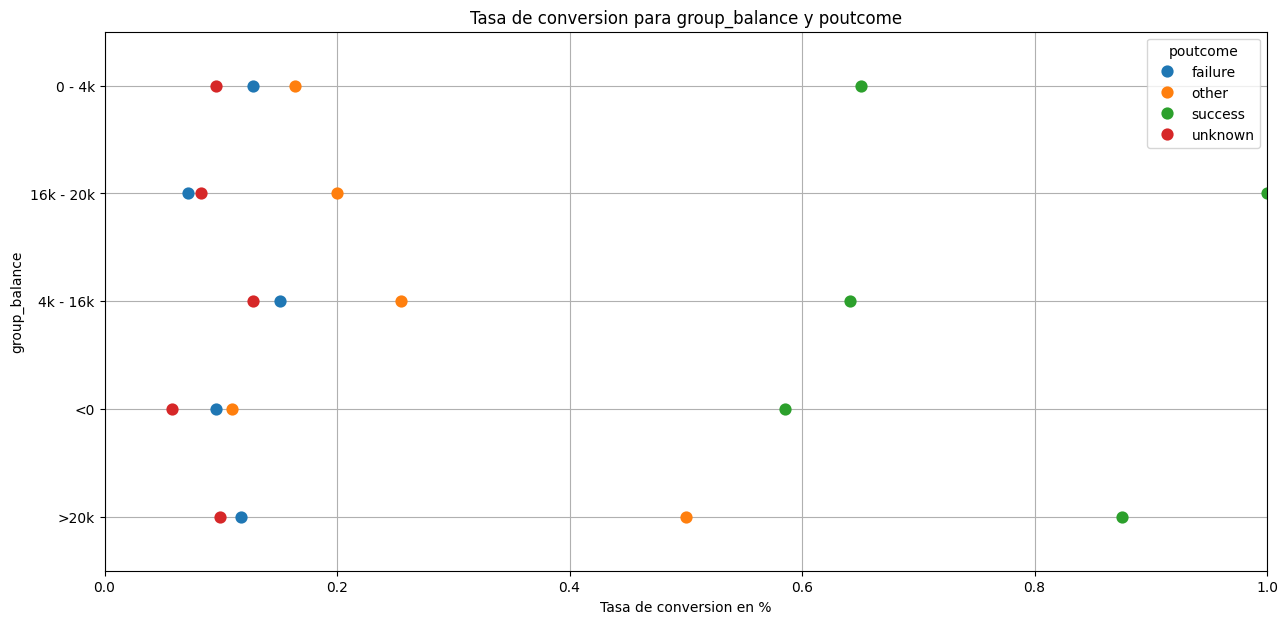

In [42]:
# analisis de las variables poutcome y group_balance
tasa_conversion_bi(['group_balance', 'poutcome'])

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


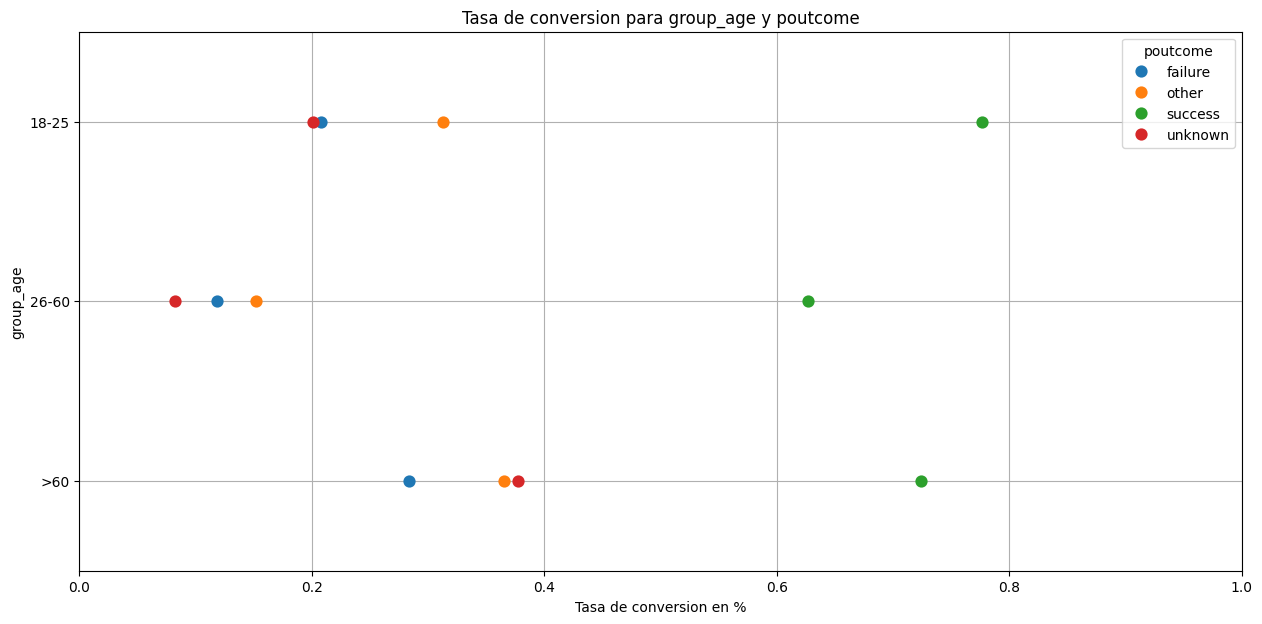

In [43]:
# analisis de las variables poutcome y gruop_age
tasa_conversion_bi(['group_age', 'poutcome'])

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


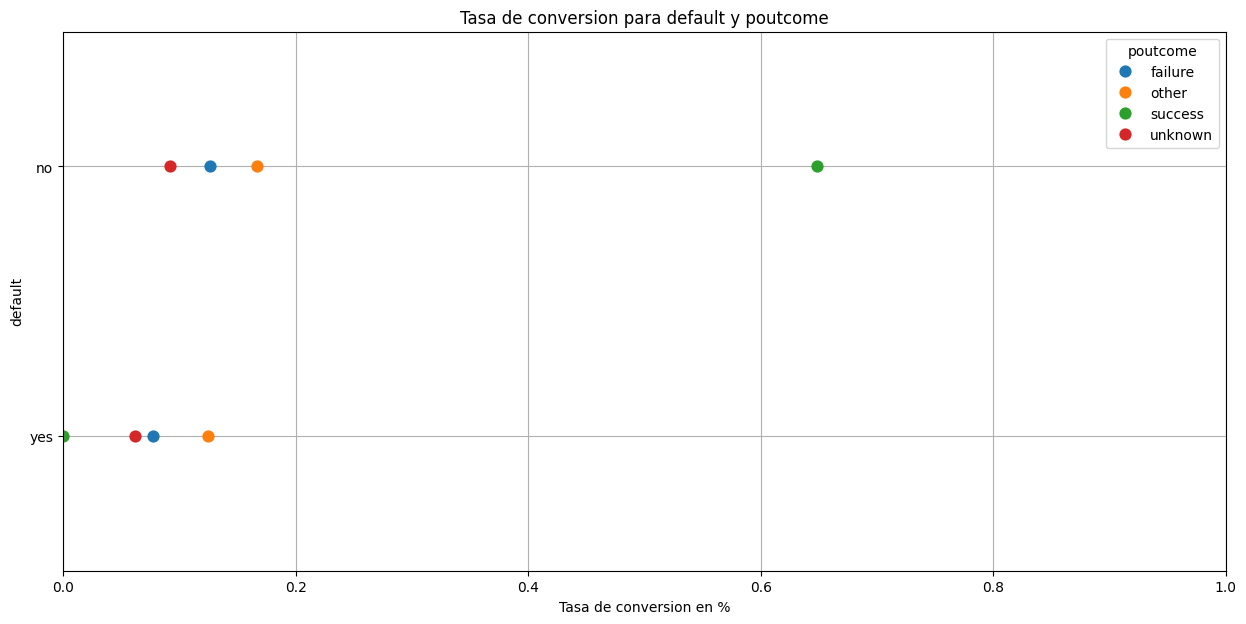

In [45]:
# analisis de las variables poutcome y default
tasa_conversion_bi(['default', 'poutcome'])

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


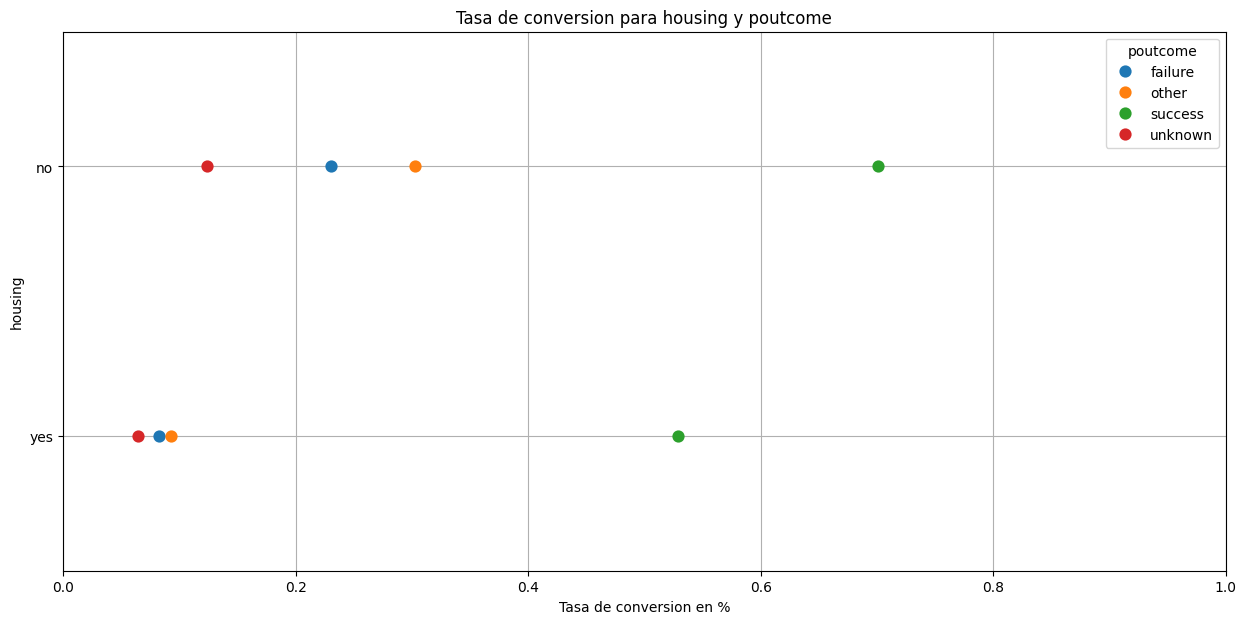

In [46]:
# analisis de las variables poutcome y housing
tasa_conversion_bi(['housing', 'poutcome'])

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


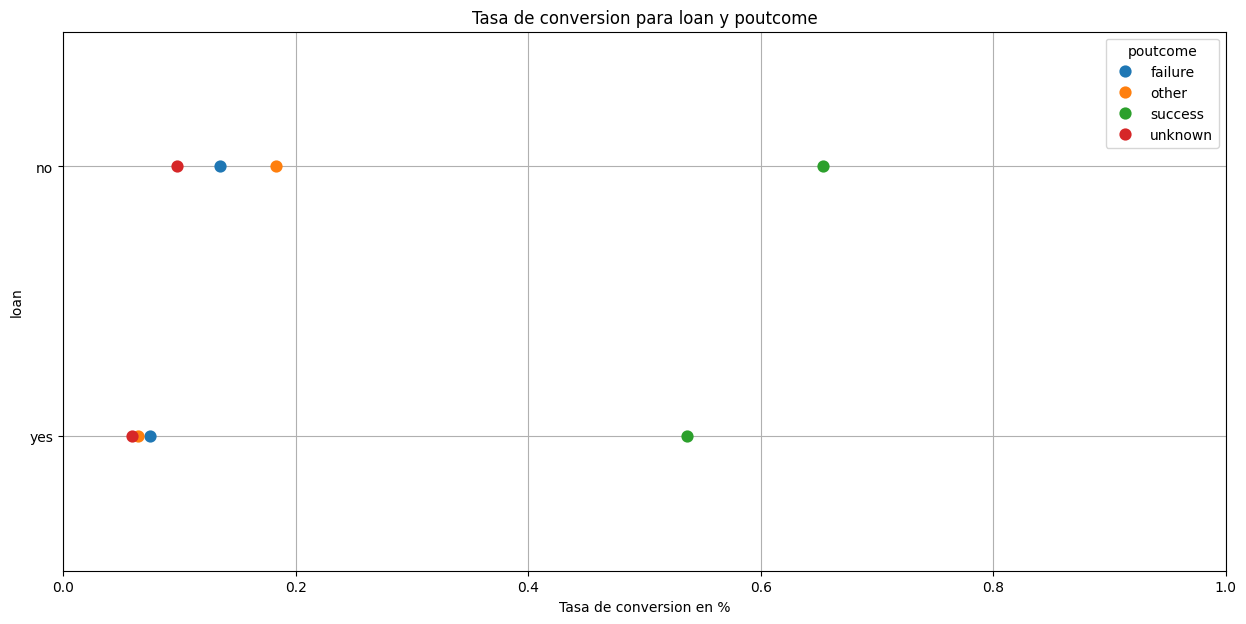

In [47]:
# analisis de las variables poutcome y loan
tasa_conversion_bi(['loan', 'poutcome'])

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


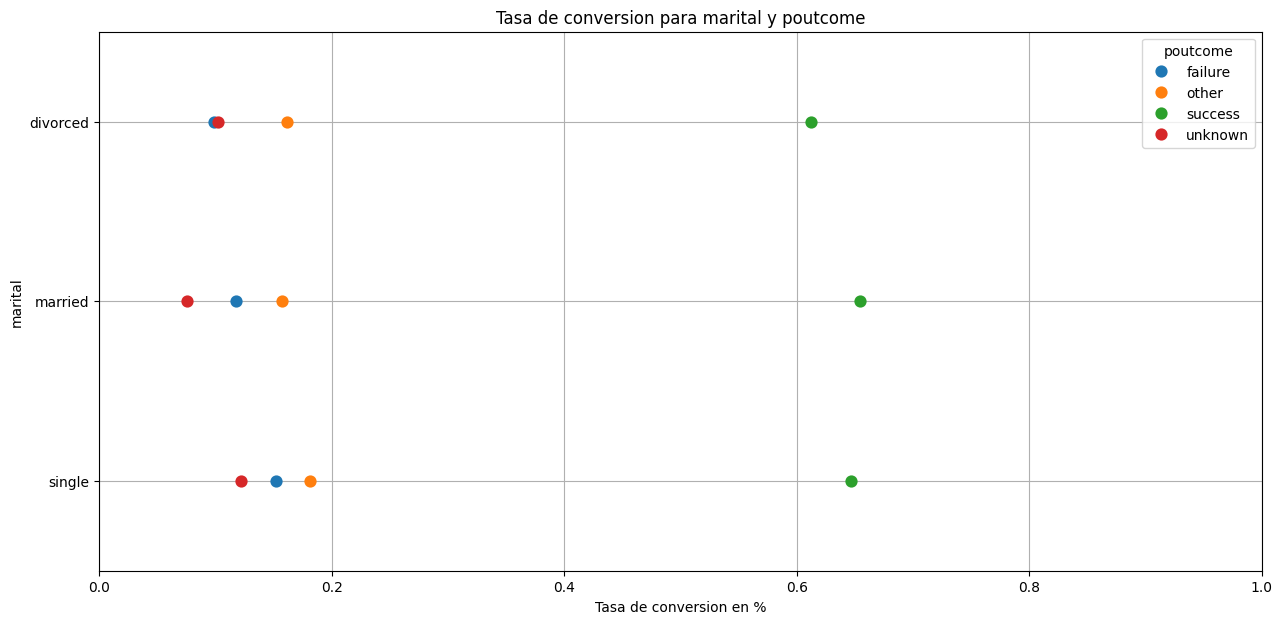

In [48]:
# # analisis de las variables poutcome y marital
tasa_conversion_bi(['marital', 'poutcome'])

C:\Users\andyt\AppData\Local\Temp\ipykernel_10772\3695866547.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=grupo['y_bin'], y=grupo[var_predictora_list[0]], hue=grupo[var_predictora_list[1]], join=False, order=order)


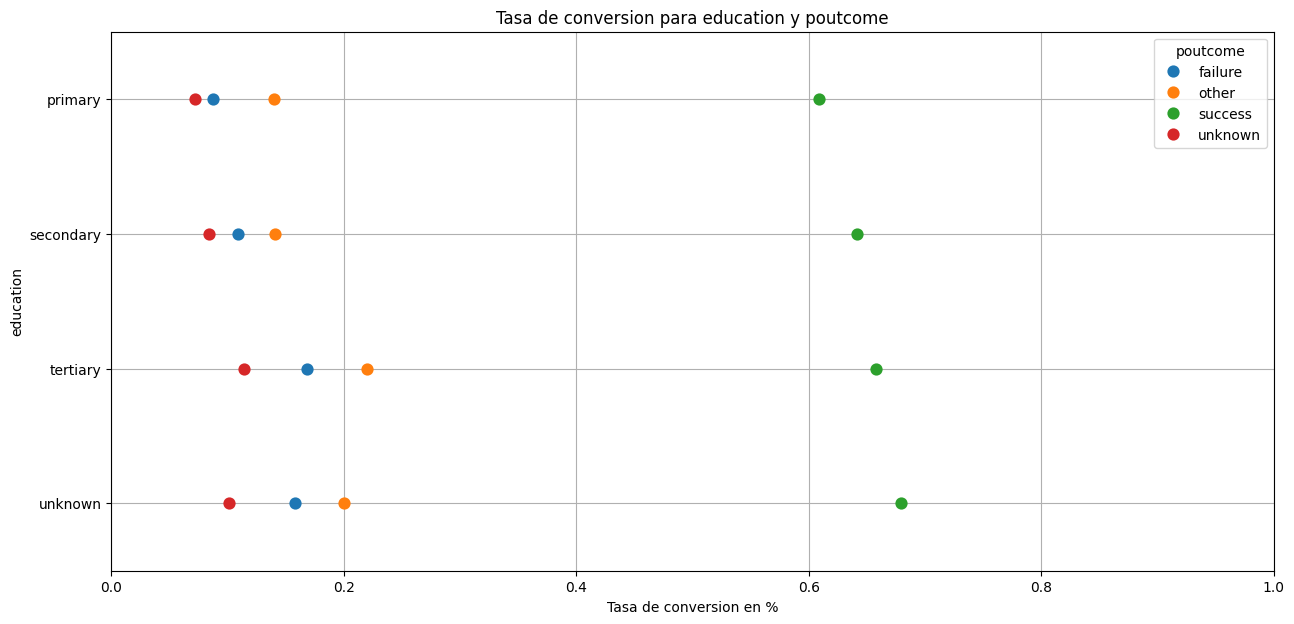

In [49]:
# analisis de las variables poutcome y education
tasa_conversion_bi(['education', 'poutcome'])

### Conclusiones
* La variable 'poutcome' seguida de 'job', 'group_balance', 'group_age' y 'default' son las que tienen mayores tasas de conversion
* Con el analisis el perfil ideal seria:
    + El cliente debe haber adquirido previamente el producto por el banco en una campaña anterior(poutcome=success)
    + Su perfil laboral: desempleado, estudiante y jubilado
    + El saldo de su cuenta que sea entre 16k y 20k preferiblemente
    + La edad entre 18 a 25 años
    + Que no tenga retraso en deuda, credito hipotecario y credito de consumo
 